In [5]:
#--------------------------Problème Tataouine V2.0--------------------------###
# 
#   idée: séparation des X et des Y
#
#--------------------------Lecture du fichier--------------------------###
fic = open(r"C:\Users\thoma\Desktop\Cours\A3 ESILV\informatique\Python\Data et IA\position_sample.csv",'r')
tab=[]
good=False
for line in fic:
    l=line.split(';')
    l[2]=''.join(x for x in l[2] if x not in '\n')
    if(good):
        lis=[]
        for e in l:
            lis.append(float(e))
        tab.append(lis)
    good = True
fic.close()
tab.sort()

###--------------------------classe individu--------------------------###

import random as rd

class Individu:
    def __init__(self,p1,p2,p3,cout=0.0):
        self._p1=p1
        self._p2=p2
        self._p3=p3
        self._cout=cout
        
    def __str__(self):
        resul="p1 : "+ str(self._p1) + " p2 : "+ str(self._p2) + " p3 : "+ str(self._p3)
        if(self._cout!=0.0):
            resul+=" cout : "+str(self._cout)
        return resul
    
    def get_p1(self):
        return self._p1
    
    def set_p1(self,val):
        self._p1=val
    
    def get_p2(self):
        return self._p2
    def set_p2(self,val):
        self._p2=val
    
    def get_p3(self):
        return self._p3
    def set_p3(self,val):
        self._p3=val
    
    def set_cout(self,val):
        self._cout=val
    
    
    def __lt__(self,other):
        return self._cout<other._cout


###--------------------------fonction de coût--------------------------###

import numpy as np
import matplotlib.pyplot as plt
import time

def f(p1,p2,p3,t):
    return p1*np.sin(p2*t+p3)


def cout_x(tab,indiv):
    sum=0.0
    for e in tab:
        sum+= abs(e[1]-f(indiv.get_p1(),indiv.get_p2(),indiv.get_p3(),e[0]))
    return sum 

def cout_y(tab,indiv):
    sum=0.0
    for e in tab:
        sum+= abs(e[2]-f(indiv.get_p1(),indiv.get_p2(),indiv.get_p3(),e[0]))
    return sum  

###--------------------------création des enfants--------------------------###
def enfant(indiv1,indiv2):
    ent=rd.randint(1,2)
    if(ent==1):
        return Individu(indiv1.get_p1(),indiv2.get_p2(),indiv2.get_p3()),Individu(indiv2.get_p1(),indiv1.get_p2(),indiv1.get_p3())
    if(ent==2):
        return Individu(indiv1.get_p1(),indiv1.get_p2(),indiv2.get_p3()),Individu(indiv2.get_p1(),indiv2.get_p2(),indiv1.get_p3())

###--------------------------fonction de mutation--------------------------###

def mutation(indiv):
    rand=rd.randint(1,3)
    if(rand==1):
        indiv.set_p1(rd.uniform(-100,100))
    if(rand==2):
        indiv.set_p2(rd.uniform(-100,100))
    if(rand==3):
        indiv.set_p3(rd.uniform(-100,100))

###--------------------------boucle pour réaliser la recherche--------------------------###

start=time.time()

#1_création de la population initiale:

n = 20
population_X = []
population_Y = []
for i in range(n):
    ind_x = [rd.uniform(-100,100) for e in range(3)]
    population_X.append(Individu(ind_x[0],ind_x[1],ind_x[2]))
    population_X[i].set_cout(cout_x(tab,population_X[i]))
    
    ind_y = [rd.uniform(-100,100) for e in range(3)]
    population_Y.append(Individu(ind_y[0],ind_y[1],ind_y[2]))
    population_Y[i].set_cout(cout_y(tab,population_Y[i]))

#2_mise en place de la boucle:

compteur=0

while(cout_x(tab,population_X[0])>13 or cout_y(tab,population_Y[0])>30):
    
    #2.1_sélection des n meilleurs individus:
    
    population_X.sort()
    population_X=population_X[:n]
    population_Y.sort()
    population_Y = population_Y[:n]
    
    #2.2_création des enfants:
    
    population2_X=[]
    population2_Y=[]
    for i in range(n//2):
        enfants_x = enfant(population_X[i],population_X[n-1-i])
        population2_X.append(enfants_x[0])
        population2_X.append(enfants_x[1])
        
        enfants_y = enfant(population_Y[i],population_Y[n-1-i])
        population2_Y.append(enfants_y[0])
        population2_Y.append(enfants_y[1])

    #2.3_mutation de la population obtenue:
    
    for i in range(len(population_X)):
        
        if(rd.random()<=0.5):
            mutation(population2_X[i])
        if(rd.random()<=0.5):
            mutation(population2_Y[i])
    
    #2.4_évaluation de chaque idividu:
    
    for i in range(n):
        population2_X[i].set_cout(cout_x(tab,population2_X[i]))
        population2_Y[i].set_cout(cout_y(tab,population2_Y[i]))

    #2.1_sélection des n meilleurs individus:
    
    population_X = population_X +population2_X
    
    population_Y = population_Y +population2_Y

    
    print("meilleur")
    print("X:")
    print(population_X[0])
    print("Y:")
    print(population_Y[0])
    
    print()
    
    print("pire")
    print("X:")
    print(population_X[-1])
    print("Y:")
    print(population_Y[-1])
    
    print()
    
    print(compteur)
    compteur+=1
    print()

end=time.time()
    

#3_résultat final:

print()
print("###--------------------------Résultat Final--------------------------###")
print()
print("Nous obtenons au final les paramètres")
print("pour x : " + str(population_X[0]) + "pour y : " + str(population_Y[0]))
print("Temps d'exécution : " + str(end-start))
print("Nombre d'exécutions: "+ str(compteur))

def graphique(ind_X,ind_Y):
    X_p=[]
    Y_p=[]
    p1=ind_X._p1
    p2=ind_X._p2
    p3=ind_X._p3
    p4=ind_Y._p1
    p5=ind_Y._p2
    p6=ind_Y._p3
    
    
    
    for e in tab:
        X_p.append(f(p1,p2,p3,float(e[0])))
        Y_p.append(f(p4,p5,p6,float(e[0])))
        print(e[0])
        print("x :" + str(X_p[-1]) + " y : "+ str(Y_p[-1]))
        plt.plot(e[1],e[2],marker='.',color='green')

    plt.plot(X_p,Y_p,'x',color='red')
    
    #T=np.linspace(tab[0][0],tab[-1][0],1000)
    
    #X=[f(p1,p2,p3,t) for t in T]  #f(ind.get_p1,ind.get_p2,ind.get_p3,t)
    #Y=[f(p4,p5,p6,t) for t in T]
    
    #plt.plot(X,Y)
        
    plt.show()
graphique(population_X[0],population_Y[0])
    
###--------------------------Notes et explications--------------------------###

#   convergence vers la solution: assez rapide elle est plus rapide en augmentant la proportion de mutation (1) (pk?)
#   question: quelle est la proportion optimale et le type de mutation optimale. En effet, ici pour la mutation je prends
#   un random entre [-100;100] alors que mon résultat est sensé converger vers une valeur précise.
#   Je peux au vu de (1) penser que les mutations au début permettent d'ouvrir un plus grand champ des possibles et donc de
#   se rapprocher de la valeur optimale cependant par la suite les muatations s'éloignent de ce résultat et ne permettent plus
#   d'améliorer la convergence. Je vais donc essayer de modifier la valeur assignée par la mutation en fct du cout V2.1
#                                        
#
#
#   problème: il est possible que X ou Y reste bloqué longetmps sur une valeur avec un cout très élevé
#   il y en a tjrs un qui converge très rapidement et l'autre bcp moins
#   =>  je vais continuer avec les prochaines versions de code et voir si le problème persiste        

        

meilleur
X:
p1 : 4.615098637531489 p2 : -69.79440378779782 p3 : 92.84179975406397 cout : 244.1532144447343
Y:
p1 : -11.910187964735414 p2 : 82.01353409478963 p3 : 43.91858505872784 cout : 392.2302488779563

pire
X:
p1 : 56.44764440416597 p2 : 55.66407936833485 p3 : 88.33671768858673 cout : 1112.64423275084
Y:
p1 : -56.8387001630315 p2 : 94.47596213610535 p3 : 87.47234031595613 cout : 1138.226860298329

0

meilleur
X:
p1 : 4.615098637531489 p2 : -69.79440378779782 p3 : 92.84179975406397 cout : 244.1532144447343
Y:
p1 : -15.930432351314423 p2 : 10.018461191349928 p3 : -21.42731457781379 cout : 339.35128498818597

pire
X:
p1 : -40.86930853559496 p2 : -79.37883013215495 p3 : 4.996770716693305 cout : 759.6421501339107
Y:
p1 : 31.352478983007416 p2 : 3.7952112965462135 p3 : 5.555687589791731 cout : 551.9003887404668

1

meilleur
X:
p1 : 4.615098637531489 p2 : -28.343643527552302 p3 : -18.995033936208188 cout : 233.48128866611003
Y:
p1 : -15.930432351314423 p2 : 10.018461191349928 p3 : -21.42

KeyboardInterrupt: 

meilleur
X:
p1 : -8.188814098829795 p2 : -72.25117279396449 p3 : -3.774398660020182 cout : 306.02251412695716
Y:
p1 : 3.188795502364968 p2 : 17.23691623218909 p3 : 95.42405198703895 cout : 393.45803886102004

pire
X:
p1 : 93.36573824136784 p2 : 60.09793771148654 p3 : -76.15795563650845 cout : 1841.686888931146
Y:
p1 : 84.39784252650466 p2 : -39.26747509469379 p3 : -11.750944237595235 cout : 1886.9027630016733

0

meilleur
X:
p1 : -8.188814098829795 p2 : 60.09793771148654 p3 : -76.15795563650845 cout : 241.41862980122255
Y:
p1 : 3.188795502364968 p2 : 32.982955174577896 p3 : 95.42405198703895 cout : 383.9334895194053

pire
X:
p1 : 55.23373876984879 p2 : -23.99472715625133 p3 : -36.52614829599303 cout : 1061.9386263293943
Y:
p1 : 43.442764611459666 p2 : -94.26128061428574 p3 : -10.403509222294943 cout : 982.4327853856149

1

meilleur
X:
p1 : -8.188814098829795 p2 : 60.09793771148654 p3 : -36.52614829599303 cout : 250.61636177503505
Y:
p1 : 3.188795502364968 p2 : -39.26747509469379 p3 : 7

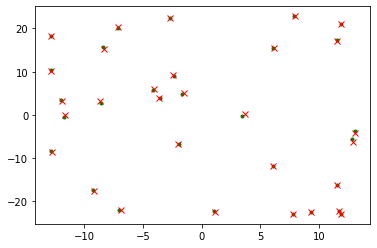

In [57]:
#--------------------------Problème Tataouine V2.0--------------------------###
# 
#   idée: séparation des X et des Y
#
#--------------------------Lecture du fichier--------------------------###
fic = open(r"C:\Users\thoma\Desktop\Cours\A3 ESILV\informatique\Python\Data et IA\position_sample.csv",'r')
tab=[]
good=False
for line in fic:
    l=line.split(';')
    l[2]=''.join(x for x in l[2] if x not in '\n')
    if(good):
        lis=[]
        for e in l:
            lis.append(float(e))
        tab.append(lis)
    good = True
fic.close()
tab.sort()

###--------------------------classe individu--------------------------###

import random as rd

class Individu:
    def __init__(self,p1,p2,p3,cout=0.0):
        self._p1=p1
        self._p2=p2
        self._p3=p3
        self._cout=cout
        
    def __str__(self):
        resul="p1 : "+ str(self._p1) + " p2 : "+ str(self._p2) + " p3 : "+ str(self._p3)
        if(self._cout!=0.0):
            resul+=" cout : "+str(self._cout)
        return resul
    
    def get_p1(self):
        return self._p1
    
    def set_p1(self,val):
        self._p1=val
    
    def get_p2(self):
        return self._p2
    def set_p2(self,val):
        self._p2=val
    
    def get_p3(self):
        return self._p3
    def set_p3(self,val):
        self._p3=val
    
    def set_cout(self,val):
        self._cout=val
    
    
    def __lt__(self,other):
        return self._cout<other._cout


###--------------------------fonction de coût--------------------------###

import numpy as np
import matplotlib.pyplot as plt
import time

def f(p1,p2,p3,t):
    return p1*np.sin(p2*t+p3)


def cout_x(tab,indiv):
    sum=0.0
    for e in tab:
        sum+= abs(e[1]-f(indiv.get_p1(),indiv.get_p2(),indiv.get_p3(),e[0]))
    return sum 

def cout_y(tab,indiv):
    sum=0.0
    for e in tab:
        sum+= abs(e[2]-f(indiv.get_p1(),indiv.get_p2(),indiv.get_p3(),e[0]))
    return sum  

###--------------------------création des enfants--------------------------###
def enfant(indiv1,indiv2):
    ent=rd.randint(1,2)
    if(ent==1):
        return Individu(indiv1.get_p1(),indiv2.get_p2(),indiv2.get_p3()),Individu(indiv2.get_p1(),indiv1.get_p2(),indiv1.get_p3())
    if(ent==2):
        return Individu(indiv1.get_p1(),indiv1.get_p2(),indiv2.get_p3()),Individu(indiv2.get_p1(),indiv2.get_p2(),indiv1.get_p3())

###--------------------------fonction de mutation--------------------------###

def mutation(indiv):
    rand=rd.randint(1,3)
    if(indiv._cout>100):
        if(rand==1):
            indiv.set_p1(indiv._p1+rd.uniform(-25,25))
        if(rand==2):
            indiv.set_p2(indiv._p2+rd.uniform(-25,25))
        if(rand==3):
            indiv.set_p3(indiv._p3+rd.uniform(0,2*np.pi))
    elif(40<indiv._cout<100):
        if(rand==1):
            indiv.set_p1(indiv._p1+rd.uniform(-1,1))
        if(rand==2):
            indiv.set_p2(indiv._p2+rd.uniform(-1,1))
        if(rand==3):
            indiv.set_p3(indiv._p3+rd.uniform(0,2*np.pi))
    else:
        if(rand==1):
            indiv.set_p1(indiv._p1+rd.uniform(-0.1,0.1))
        if(rand==2):
            indiv.set_p2(indiv._p2+rd.uniform(-0.1,0.1))
        if(rand==3):
            indiv.set_p3(indiv._p3+rd.uniform(0,2*np.pi))

            


###--------------------------boucle pour réaliser la recherche--------------------------###

start=time.time()

#1_création de la population initiale:

n = 20
population_X = []
population_Y = []
for i in range(n):
    ind_x = [rd.uniform(-100,100) for e in range(3)]
    population_X.append(Individu(ind_x[0],ind_x[1],ind_x[2]))
    population_X[i].set_cout(cout_x(tab,population_X[i]))
    
    ind_y = [rd.uniform(-100,100) for e in range(3)]
    population_Y.append(Individu(ind_y[0],ind_y[1],ind_y[2]))
    population_Y[i].set_cout(cout_y(tab,population_Y[i]))

#2_mise en place de la boucle:

compteur=0

while(cout_x(tab,population_X[0])>2 or cout_y(tab,population_Y[0])>5):
    
    #2.1_sélection des n meilleurs individus:
    
    population_X.sort()
    population_X=population_X[:n]
    population_Y.sort()
    population_Y = population_Y[:n]
    
    print("meilleur")
    print("X:")
    print(population_X[0])
    print("Y:")
    print(population_Y[0])
    
    print()
    
    print("pire")
    print("X:")
    print(population_X[-1])
    print("Y:")
    print(population_Y[-1])
    
    print()
    
    print(compteur)
    compteur+=1
    print()
    
    #2.2_création des enfants:
    
    population2_X=[]
    population2_Y=[]
    for i in range(n//2):
        enfants_x = enfant(population_X[i],population_X[n-1-i])
        population2_X.append(enfants_x[0])
        population2_X.append(enfants_x[1])
        
        enfants_y = enfant(population_Y[i],population_Y[n-1-i])
        population2_Y.append(enfants_y[0])
        population2_Y.append(enfants_y[1])
        
    #2.4_évaluation de chaque idividu:
    
    for i in range(n):
        population2_X[i].set_cout(cout_x(tab,population2_X[i]))
        population2_Y[i].set_cout(cout_y(tab,population2_Y[i]))

    #2.3_mutation de la population obtenue:
    
    for i in range(len(population_X)):
        
        if(rd.random()<=0.5):
            mutation(population_X[i])
        if(rd.random()<=0.5):
            mutation(population_Y[i])
    
    for i in range(n):
        population_X[i].set_cout(cout_x(tab,population_X[i]))
        population_Y[i].set_cout(cout_y(tab,population_Y[i]))

    #2.1_concaténation enfants + parents:
    
    population_X = population_X +population2_X
    
    population_Y = population_Y +population2_Y

    
    

end=time.time()
    

#3_résultat final:

print()
print("###--------------------------Résultat Final--------------------------###")
print()
print("Nous obtenons au final les paramètres")
print("pour x : " + str(population_X[0]) + "pour y : " + str(population_Y[0]))
print("Temps d'exécution : " + str(end-start))
print("Nombre d'exécutions: "+ str(compteur))

def graphique(ind_X,ind_Y):
    X_p=[]
    Y_p=[]
    p1=ind_X._p1
    p2=ind_X._p2
    p3=ind_X._p3
    p4=ind_Y._p1
    p5=ind_Y._p2
    p6=ind_Y._p3
    
    
    
    for e in tab:
        X_p.append(f(p1,p2,p3,float(e[0])))
        Y_p.append(f(p4,p5,p6,float(e[0])))
        print(e[0])
        print("x :" + str(X_p[-1]) + " y : "+ str(Y_p[-1]))
        plt.plot(e[1],e[2],marker='.',color='green')

    plt.plot(X_p,Y_p,'x',color='red')
    
    #T=np.linspace(tab[0][0],tab[-1][0],1000)
    
    #X=[f(p1,p2,p3,t) for t in T]  #f(ind.get_p1,ind.get_p2,ind.get_p3,t)
    #Y=[f(p4,p5,p6,t) for t in T]
    
    #plt.plot(X,Y)
        
    plt.show()
graphique(population_X[0],population_Y[0])
    
###--------------------------Notes et explications--------------------------###

#   test1:
#       la convergence est très rapide (7-12s), cependant le programme"bloque parfois sur des valeurs de x et de y
#
#       idées pour la suite:
#        =>faire un compteur pour x et y et recréer une pop si la meme val de x ou y apparait n fois V2.1
#        => faire que des mutations sur tous les éléments de pop2 quand popx[0]==popx[-1] V2.2
#       rq: je suis un peu frustré de ne pas comprendre pourquoi en prenant 26 à la place de 25 dans la fonction de 
#       mutation, il est impossible d'obtenir un résultat
#
#

        

meilleur
X:
p1 : -7.968554949728684 p2 : 48.574548735485536 p3 : 95.07274596120124 cout : 269.87495262120433
Y:
p1 : -0.3567171374797766 p2 : 19.868113268080805 p3 : -21.081021447698987 cout : 399.3610695650521

pire
X:
p1 : -58.21501454972293 p2 : -6.665855961552097 p3 : -73.10922601821434 cout : 946.5306444018921
Y:
p1 : -53.397062343399384 p2 : 27.240116644573448 p3 : -25.88192415604288 cout : 1068.765830709419

0

meilleur
X:
p1 : 3.953303633463449 p2 : -56.343640874327235 p3 : -91.24819839691685 cout : 259.79813695548097
Y:
p1 : -4.571553044391379 p2 : 99.21417910621656 p3 : 55.47700008983 cout : 380.3030714907434

pire
X:
p1 : 56.215119797300055 p2 : 89.88918541807462 p3 : -72.05648598932922 cout : 1028.808315059952
Y:
p1 : -4.984941611239506 p2 : -12.055279642033966 p3 : 111.28319165613516 cout : 391.09090406012587

1

meilleur
X:
p1 : -1.0621547948826482 p2 : 66.2376946790798 p3 : 0.348266177666261 cout : 245.6321532733401
Y:
p1 : -4.571553044391379 p2 : 99.21417910621656 p3 : 

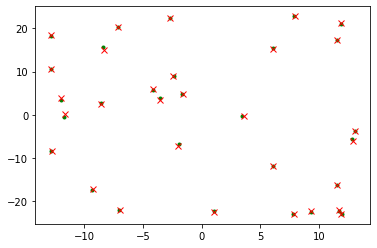

In [72]:
#--------------------------Problème Tataouine V2.1--------------------------###
# 
#   idée: séparation des X et des Y
#
#--------------------------Lecture du fichier--------------------------###
fic = open(r"C:\Users\thoma\Desktop\Cours\A3 ESILV\informatique\Python\Data et IA\position_sample.csv",'r')
tab=[]
good=False
for line in fic:
    l=line.split(';')
    l[2]=''.join(x for x in l[2] if x not in '\n')
    if(good):
        lis=[]
        for e in l:
            lis.append(float(e))
        tab.append(lis)
    good = True
fic.close()
tab.sort()

###--------------------------classe individu--------------------------###

import random as rd

class Individu:
    def __init__(self,p1,p2,p3,cout=0.0):
        self._p1=p1
        self._p2=p2
        self._p3=p3
        self._cout=cout
        
    def __str__(self):
        resul="p1 : "+ str(self._p1) + " p2 : "+ str(self._p2) + " p3 : "+ str(self._p3)
        if(self._cout!=0.0):
            resul+=" cout : "+str(self._cout)
        return resul
    
    def get_p1(self):
        return self._p1
    
    def set_p1(self,val):
        self._p1=val
    
    def get_p2(self):
        return self._p2
    def set_p2(self,val):
        self._p2=val
    
    def get_p3(self):
        return self._p3
    def set_p3(self,val):
        self._p3=val
    
    def set_cout(self,val):
        self._cout=val
    
    
    def __lt__(self,other):
        return self._cout<other._cout


###--------------------------fonction de coût--------------------------###

import numpy as np
import matplotlib.pyplot as plt
import time

def f(p1,p2,p3,t):
    return p1*np.sin(p2*t+p3)


def cout_x(tab,indiv):
    sum=0.0
    for e in tab:
        sum+= abs(e[1]-f(indiv.get_p1(),indiv.get_p2(),indiv.get_p3(),e[0]))
    return sum 

def cout_y(tab,indiv):
    sum=0.0
    for e in tab:
        sum+= abs(e[2]-f(indiv.get_p1(),indiv.get_p2(),indiv.get_p3(),e[0]))
    return sum  

###--------------------------création des enfants--------------------------###
def enfant(indiv1,indiv2):
    ent=rd.randint(1,2)
    if(ent==1):
        return Individu(indiv1.get_p1(),indiv2.get_p2(),indiv2.get_p3()),Individu(indiv2.get_p1(),indiv1.get_p2(),indiv1.get_p3())
    if(ent==2):
        return Individu(indiv1.get_p1(),indiv1.get_p2(),indiv2.get_p3()),Individu(indiv2.get_p1(),indiv2.get_p2(),indiv1.get_p3())

###--------------------------fonction de mutation--------------------------###

def mutation(indiv):
    rand=rd.randint(1,3)
    if(indiv._cout>100):
        if(rand==1):
            indiv.set_p1(indiv._p1+rd.uniform(-25,25))
        if(rand==2):
            indiv.set_p2(indiv._p2+rd.uniform(-25,25))
        if(rand==3):
            indiv.set_p3(indiv._p3+rd.uniform(-25,25))
    elif(40<indiv._cout<100):
        if(rand==1):
            indiv.set_p1(indiv._p1+rd.uniform(-1,1))
        if(rand==2):
            indiv.set_p2(indiv._p2+rd.uniform(-1,1))
        if(rand==3):
            indiv.set_p3(indiv._p3+rd.uniform(-1,1))
    else:
        if(rand==1):
            indiv.set_p1(indiv._p1+rd.uniform(-0.1,0.1))
        if(rand==2):
            indiv.set_p2(indiv._p2+rd.uniform(-0.1,0.1))
        if(rand==3):
            indiv.set_p3(indiv._p3+rd.uniform(-0.1,0.1))

###--------------------------boucle pour réaliser la recherche--------------------------###

start=time.time()

#1_création de la population initiale:

n = 20
population_X = []
population_Y = []
for i in range(n):
    ind_x = [rd.uniform(-100,100) for e in range(3)]
    population_X.append(Individu(ind_x[0],ind_x[1],ind_x[2]))
    population_X[i].set_cout(cout_x(tab,population_X[i]))
    
    ind_y = [rd.uniform(-100,100) for e in range(3)]
    population_Y.append(Individu(ind_y[0],ind_y[1],ind_y[2]))
    population_Y[i].set_cout(cout_y(tab,population_Y[i]))

#2_mise en place de la boucle:

compteur_x,compteur_y=0,0
compteur=0
best_valx=population_X[0]
best_valy=population_Y[0]

while(cout_x(tab,population_X[0])>2 or cout_y(tab,population_Y[0])>5):
    
    #2.1_sélection des n meilleurs individus et modification "anti-blocage":
    
    population_X.sort()
    population_X=population_X[:n]
    population_Y.sort()
    population_Y = population_Y[:n]
    
    
    
    if(best_valx==population_X[0]):
        compteur_x+=1
    else: 
        compteur_x=0
        best_valx=population_X[0]
        
    if(best_valy==population_Y[0]):
        compteur_y+=1
    else: 
        compteur_y=0
        best_valy=population_Y[0]
        
    if(compteur_x>50 and population_X[0]._cout>10):
        pop_X=[]
        for i in range(n):
            ind_x = [rd.uniform(-100,100) for e in range(3)]
            pop_X.append(Individu(ind_x[0],ind_x[1],ind_x[2]))
            pop_X[i].set_cout(cout_x(tab,pop_X[i]))
        compteur_x=0
        population_X=pop_X
    
    if(compteur_y>50 and population_Y[0]._cout>10):
        pop_Y=[]
        for i in range(n):
            ind_y = [rd.uniform(-100,100) for e in range(3)]
            pop_Y.append(Individu(ind_y[0],ind_y[1],ind_y[2]))
            pop_Y[i].set_cout(cout_y(tab,pop_Y[i]))
        compteur_y=0
        population_Y=pop_Y
    
    
    #2.2_création des enfants:
    
    population2_X=[]
    population2_Y=[]
    for i in range(n//2):
        enfants_x = enfant(population_X[i],population_X[n-1-i])
        population2_X.append(enfants_x[0])
        population2_X.append(enfants_x[1])
        
        enfants_y = enfant(population_Y[i],population_Y[n-1-i])
        population2_Y.append(enfants_y[0])
        population2_Y.append(enfants_y[1])
        
    #2.4_évaluation de chaque idividu:
    
    for i in range(n):
        population2_X[i].set_cout(cout_x(tab,population2_X[i]))
        population2_Y[i].set_cout(cout_y(tab,population2_Y[i]))

    #2.3_mutation de la population obtenue:
    
    for i in range(n):
        
        if(rd.random()<=0.5):
            mutation(population2_X[i])
        if(rd.random()<=0.5):
            mutation(population2_Y[i])
    
    for i in range(n):
        population2_X[i].set_cout(cout_x(tab,population2_X[i]))
        population2_Y[i].set_cout(cout_y(tab,population2_Y[i]))

    #2.1_concaténation enfants + parents:
    
    population_X = population_X +population2_X
    population_Y = population_Y +population2_Y

    
    print("meilleur")
    print("X:")
    print(population_X[0])
    print("Y:")
    print(population_Y[0])
    
    print()
    
    print("pire")
    print("X:")
    print(population_X[-1])
    print("Y:")
    print(population_Y[-1])
    
    print()
    
    print(compteur)
    compteur+=1
    print()

end=time.time()
    

#3_résultat final:

print()
print("###--------------------------Résultat Final--------------------------###")
print()
print("Nous obtenons au final les paramètres")
print("pour x : " + str(population_X[0]) + "pour y : " + str(population_Y[0]))
print("Temps d'exécution : " + str(end-start))
print("Nombre d'exécutions: "+ str(compteur))

def graphique(ind_X,ind_Y):
    X_p=[]
    Y_p=[]
    p1=ind_X._p1
    p2=ind_X._p2
    p3=ind_X._p3
    p4=ind_Y._p1
    p5=ind_Y._p2
    p6=ind_Y._p3
    
    
    
    for e in tab:
        X_p.append(f(p1,p2,p3,float(e[0])))
        Y_p.append(f(p4,p5,p6,float(e[0])))
        print(e[0])
        print("x :" + str(X_p[-1]) + " y : "+ str(Y_p[-1]))
        plt.plot(e[1],e[2],marker='.',color='green')

    plt.plot(X_p,Y_p,'x',color='red')
    
    #T=np.linspace(tab[0][0],tab[-1][0],1000)
    
    #X=[f(p1,p2,p3,t) for t in T]  #f(ind.get_p1,ind.get_p2,ind.get_p3,t)
    #Y=[f(p4,p5,p6,t) for t in T]
    
    #plt.plot(X,Y)
        
    plt.show()
graphique(population_X[0],population_Y[0])
    
###--------------------------Notes et explications--------------------------###

#   conclusion: fonctionne très bien et converge rapidement vers la solution
#   cependant, je pense pouvoir encore améliorer ce programme en tenant compte des caractéristiques de notre modèle de notre modèle
#

        